**Βήμα 1. Συλλογή δεδομένων:**




In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

response = requests.get("https://en.wikipedia.org/wiki/Giannis_Antetokounmpo")
soup = BeautifulSoup(response.text, 'html.parser')
paragraphs = soup.find_all('p')
parsed_paragraph = [p.text.strip() for p in paragraphs]

try:
    response = requests.get("https://en.wikipedia.org/wiki/Giannis_Antetokounmpo")
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
except requests.RequestException as e:
    print(f"Request failed: {e}")

data = [{'Paragraph': paragraph} for paragraph in parsed_paragraph]
df = pd.DataFrame(data)
df.to_csv('giannis_data.csv', index=False, encoding='utf-8')



In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

response = requests.get("https://en.wikipedia.org/wiki/Tyrese_Haliburton")
soup = BeautifulSoup(response.text, 'html.parser')
paragraphs = soup.find_all('p')
parsed_paragraph = [p.text.strip() for p in paragraphs]

try:
    response = requests.get("https://en.wikipedia.org/wiki/Tyrese_Haliburton")
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
except requests.RequestException as e:
    print(f"Request failed: {e}")

data = [{'Paragraph': paragraph} for paragraph in parsed_paragraph]
df = pd.DataFrame(data)
df.to_csv('tyrese_data.csv', index=False, encoding='utf-8')


**Βήμα 2. Προεπεξεργασία κειμένου (Text Processing):**

Lemmatization:

In [16]:
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize(giannis_data):
    tok = word_tokenize(giannis_data)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(t) for t in tok]

def process_csv(my_file):
    # Initialize an empty list to collect all the text from the file
    all_text = ""

    # Open and read the CSV file
    with open(my_file, mode="r", encoding="utf-8") as token_file:
        reader = csv.reader(token_file)

        for row in reader:
            all_text += " " + row[0]  # Add space to separate texts from
            # different rows

    lemmatized_tokens = lemmatize(all_text)

    print("Lemmatization:\n", lemmatized_tokens)


my_file = "giannis_data.csv"
process_csv(my_file)




Lemmatization:
 ['Paragraph', 'Giannis', 'Sina', 'Ugo', 'Antetokounmpo', '[', 'a', ']', '(', 'né', 'Adetokunbo', ';', '[', 'b', ']', 'born', 'December', '6', ',', '1994', ')', 'is', 'a', 'Greek', 'and', 'Nigerian', 'professional', 'basketball', 'player', 'for', 'the', 'Milwaukee', 'Bucks', 'of', 'the', 'National', 'Basketball', 'Association', '(', 'NBA', ')', '.', 'His', 'size', ',', 'speed', ',', 'strength', ',', 'and', 'country', 'of', 'origin', 'have', 'earned', 'him', 'the', 'nickname', '``', 'Greek', 'Freak', "''", '.', 'He', 'is', 'widely', 'regarded', 'a', 'one', 'of', 'the', 'greatest', 'power', 'forward', 'of', 'all', 'time', 'a', 'well', 'a', 'one', 'of', 'the', 'greatest', 'player', 'of', 'all', 'time', '.', '[', '2', ']', '[', '3', ']', '[', '4', ']', '[', '5', ']', '[', '6', ']', '[', '7', ']', 'Born', 'and', 'raised', 'in', 'Athens', 'to', 'Nigerian', 'parent', ',', 'Antetokounmpo', 'began', 'playing', 'basketball', 'for', 'the', 'youth', 'team', 'of', 'Filathlitikos', 'i

Remove Special Characters:

In [8]:
import csv
import re
from nltk.tokenize import word_tokenize

def remove_special_characters(giannis_data):
    # Use regex to remove non-alphabetic characters (keeps letters and spaces)
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', giannis_data)
    return cleaned_text

def process_csv(my_file):
    # Initialize an empty string to collect all the text from the file
    all_text = ""

    # Open and read the CSV file
    with open(my_file, mode="r", encoding="utf-8") as token_file:
        reader = csv.reader(token_file)

        for row in reader:
            all_text += " " + row[0]  # Add space to separate texts
            # rom different rows

    # Remove special characters from the entire concatenated text
    cleaned_text = remove_special_characters(all_text)

    tokens = word_tokenize(cleaned_text)

    print("Cleaned text's special characters :\n", tokens)

my_file = "giannis_data.csv"
process_csv(my_file)



Cleaned text's special characters :
 ['Paragraph', 'Giannis', 'Sina', 'Ugo', 'Antetokounmpoa', 'n', 'Adetokunbob', 'born', 'December', 'is', 'a', 'Greek', 'and', 'Nigerian', 'professional', 'basketball', 'player', 'for', 'the', 'Milwaukee', 'Bucks', 'of', 'the', 'National', 'Basketball', 'Association', 'NBA', 'His', 'size', 'speed', 'strength', 'and', 'country', 'of', 'origin', 'have', 'earned', 'him', 'the', 'nickname', 'Greek', 'Freak', 'He', 'is', 'widely', 'regarded', 'as', 'one', 'of', 'the', 'greatest', 'power', 'forwards', 'of', 'all', 'time', 'as', 'well', 'as', 'one', 'of', 'the', 'greatest', 'players', 'of', 'all', 'time', 'Born', 'and', 'raised', 'in', 'Athens', 'to', 'Nigerian', 'parents', 'Antetokounmpo', 'began', 'playing', 'basketball', 'for', 'the', 'youth', 'teams', 'of', 'Filathlitikos', 'in', 'Athens', 'In', 'he', 'began', 'playing', 'for', 'the', 'clubs', 'senior', 'team', 'before', 'entering', 'the', 'NBA', 'draft', 'where', 'he', 'was', 'selected', 'th', 'overall'

Stemming:

In [10]:
import csv
import nltk
from nltk.tokenize import word_tokenize

def stemming(giannis_data):
    tok = word_tokenize(giannis_data)
    porter = nltk.PorterStemmer()
    return [porter.stem(t) for t in tok]

def process_csv(my_file):
    # Initialize an empty list to collect all the text from the file
    all_text = ""

    # Open and read the CSV file
    with open(my_file, mode="r", encoding="utf-8") as csv_file:
        reader = csv.reader(csv_file)

        for row in reader:
            all_text += " " + row[0]  # Add space to separate texts from
            # different rows

    stemmed_tokens = stemming(all_text)

    print("Stemming:\n", stemmed_tokens)


# Provide the path to your CSV file
my_file = "giannis_data.csv"  # Change this to the correct path
process_csv(my_file)




Stemming:
 ['paragraph', 'gianni', 'sina', 'ugo', 'antetokounmpo', '[', 'a', ']', '(', 'né', 'adetokunbo', ';', '[', 'b', ']', 'born', 'decemb', '6', ',', '1994', ')', 'is', 'a', 'greek', 'and', 'nigerian', 'profession', 'basketbal', 'player', 'for', 'the', 'milwauke', 'buck', 'of', 'the', 'nation', 'basketbal', 'associ', '(', 'nba', ')', '.', 'hi', 'size', ',', 'speed', ',', 'strength', ',', 'and', 'countri', 'of', 'origin', 'have', 'earn', 'him', 'the', 'nicknam', '``', 'greek', 'freak', "''", '.', 'he', 'is', 'wide', 'regard', 'as', 'one', 'of', 'the', 'greatest', 'power', 'forward', 'of', 'all', 'time', 'as', 'well', 'as', 'one', 'of', 'the', 'greatest', 'player', 'of', 'all', 'time', '.', '[', '2', ']', '[', '3', ']', '[', '4', ']', '[', '5', ']', '[', '6', ']', '[', '7', ']', 'born', 'and', 'rais', 'in', 'athen', 'to', 'nigerian', 'parent', ',', 'antetokounmpo', 'began', 'play', 'basketbal', 'for', 'the', 'youth', 'team', 'of', 'filathlitiko', 'in', 'athen', '.', 'in', '2011', ',

Stop-word Removal:

In [14]:
import csv
import nltk
from nltk.tokenize import word_tokenize

def remove_stopwords(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    cleaned_tokens = [token for token in tokens if token.lower() not in stopwords]
    return cleaned_tokens

def process_csv(my_file):
    # Initialize an empty string to collect all the text from the file
    all_text = ""

    # Open and read the CSV file
    with open(my_file, mode="r", encoding="utf-8") as token_file:
        reader = csv.reader(token_file)

        for row in reader:
            all_text += " " + row[0]  # Add space to separate texts from
            # different rows

    tokens = word_tokenize(all_text)

    # Remove stopwords from the tokens
    cleaned_tokens = remove_stopwords(tokens)

    print("Removed stopwords:\n", cleaned_tokens)

my_file = "giannis_data.csv"
process_csv(my_file)



Removed stopwords:
 ['Paragraph', 'Giannis', 'Sina', 'Ugo', 'Antetokounmpo', '[', ']', '(', 'né', 'Adetokunbo', ';', '[', 'b', ']', 'born', 'December', '6', ',', '1994', ')', 'Greek', 'Nigerian', 'professional', 'basketball', 'player', 'Milwaukee', 'Bucks', 'National', 'Basketball', 'Association', '(', 'NBA', ')', '.', 'size', ',', 'speed', ',', 'strength', ',', 'country', 'origin', 'earned', 'nickname', '``', 'Greek', 'Freak', "''", '.', 'widely', 'regarded', 'one', 'greatest', 'power', 'forwards', 'time', 'well', 'one', 'greatest', 'players', 'time', '.', '[', '2', ']', '[', '3', ']', '[', '4', ']', '[', '5', ']', '[', '6', ']', '[', '7', ']', 'Born', 'raised', 'Athens', 'Nigerian', 'parents', ',', 'Antetokounmpo', 'began', 'playing', 'basketball', 'youth', 'teams', 'Filathlitikos', 'Athens', '.', '2011', ',', 'began', 'playing', 'club', "'s", 'senior', 'team', 'entering', '2013', 'NBA', 'draft', ',', 'selected', '15th', 'overall', 'Bucks', '.', '2016–17', ',', 'led', 'Bucks', 'five'

Tokenization:

In [17]:
import csv
import nltk
from nltk.tokenize import word_tokenize

my_file = "giannis_data.csv"

# Open and read the CSV file
with open(my_file, mode="r", encoding="utf-8") as token_file:
    reader = csv.reader(token_file)

    # Initialize lists to collect tokens
    split_tokens_list = []
    word_tokenize_list = []

    # Process the file
    for row in reader:
        for cell in row:
            # Split method
            split_tokens_list.extend(cell.split())

            # Word Tokenize method
            word_tokenize_list.extend(word_tokenize(cell))

    # Print results once for the entire file
    print("Split Method:", split_tokens_list)
    print("Word Tokenize:", word_tokenize_list)



Split Method: ['Paragraph', 'Giannis', 'Sina', 'Ugo', 'Antetokounmpo[a]', '(né', 'Adetokunbo;[b]', 'born', 'December', '6,', '1994)', 'is', 'a', 'Greek', 'and', 'Nigerian', 'professional', 'basketball', 'player', 'for', 'the', 'Milwaukee', 'Bucks', 'of', 'the', 'National', 'Basketball', 'Association', '(NBA).', 'His', 'size,', 'speed,', 'strength,', 'and', 'country', 'of', 'origin', 'have', 'earned', 'him', 'the', 'nickname', '"Greek', 'Freak".', 'He', 'is', 'widely', 'regarded', 'as', 'one', 'of', 'the', 'greatest', 'power', 'forwards', 'of', 'all', 'time', 'as', 'well', 'as', 'one', 'of', 'the', 'greatest', 'players', 'of', 'all', 'time.[2][3][4][5][6][7]', 'Born', 'and', 'raised', 'in', 'Athens', 'to', 'Nigerian', 'parents,', 'Antetokounmpo', 'began', 'playing', 'basketball', 'for', 'the', 'youth', 'teams', 'of', 'Filathlitikos', 'in', 'Athens.', 'In', '2011,', 'he', 'began', 'playing', 'for', 'the', "club's", 'senior', 'team', 'before', 'entering', 'the', '2013', 'NBA', 'draft,', '

**Βήμα 3. Ευρετήριο (Indexing):**

Inverted Index:

In [18]:
import csv
from nltk.tokenize import word_tokenize


def build_inverted_index(csv_files):
    inverted_index = {}
    for file_id, csv_file in enumerate(csv_files):
        # Open and read the current CSV file
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row_index, row in enumerate(reader):
                # Gather the text from all columns in one row
                row_text = " ".join(row)
                tokens = word_tokenize(row_text)

                # Add tokens to the inverted index
                for token in tokens:

                    token_lower = token.lower()  # Converting to lowercase
                    # Checks if token exists in inverted_index dictionary
                    if token_lower not in inverted_index:
                        # if it's not, it's added as a new key with {} as its value
                        inverted_index[token_lower] = {}

                    # Checks whether the file_id is already a key under the token's
                    # entry in the inverted_index.
                    if file_id not in inverted_index[token_lower]:
                        # Adds the file_id as a key with an empty list [] as its value.
                        inverted_index[token_lower][file_id] = []

                    # Checks if the current row_index is already in the list of
                    # row indices for this token and file.
                    if row_index not in inverted_index[token_lower][file_id]:
                        # Adds the row_index to the list for the token under
                        # the current file_id
                        inverted_index[token_lower][file_id].append(row_index)

    return inverted_index


# Function to query the inverted index
def query_inverted_index(inverted_index, term):
    term_lower = term.lower()
    return inverted_index.get(term_lower, {})


csv_files = ["giannis_data.csv", "tyrese_data.csv"]

# Build the inverted index
inverted_index = build_inverted_index(csv_files)

# Example of Boolean
query_entry = "basketball"
matching_query = query_inverted_index(inverted_index, query_entry)

if matching_query:
    print(f"Term '{query_entry}' found in:")
    for file_id, rows in matching_query.items():
        print(f"  In File: {csv_files[file_id]}")
        print(f"  Rows: {rows}")
else:
    print(f"Term '{query_entry}' was not found in any file you mentioned.")


Term 'basketball' found in:
  In File: giannis_data.csv
  Rows: [2, 3, 6, 22, 37, 40, 52, 55]
  In File: tyrese_data.csv
  Rows: [2, 4, 5, 7, 10, 19, 27, 28, 30]


Trie Index:

In [19]:
import csv
from nltk.tokenize import word_tokenize

class TrieNode:
    def __init__(self):
        # Each node contains a dictionary of children and
        # end_word indicates the end of a word
        self.children = {}
        self.end_word = False


class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.end_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.end_word


def build_trie_index(csv_files):
    trie = Trie()

    for csv_file in csv_files:
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row in reader:
                # Combine all columns into one string
                row_text = " ".join(row)
                tokens = word_tokenize(row_text)
                for token in tokens:
                    token_lower = token.lower()  # Converting to lowercase
                    trie.insert(token_lower)

    return trie

def query_trie_index(trie, term):
    term_lower = term.lower()
    return trie.search(term_lower)

# Example
if __name__ == "__main__":
    csv_files = ["giannis_data.csv", "tyrese_data.csv"]

    # Build the Trie index
    trie_index = build_trie_index(csv_files)

    # Query the Trie index
    query_term = "basketball"
    if query_trie_index(trie_index, query_term):
        print(f"Term '{query_term}' was found in the CSV files.")
    else:
        print(f"Term '{query_term}' was not found in any file you mentioned.")


Term 'basketball' was found in the CSV files.


**Βήμα 4. Μηχανή αναζήτησης (Search Engine):**


Query Processing:





In [20]:
import csv
from nltk.tokenize import word_tokenize


def build_inverted_index(csv_files):
    inverted_index = {}
    for file_id, csv_file in enumerate(csv_files):
        # Open and read the current CSV file
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row_index, row in enumerate(reader):
                # Gather the text from all columns in one row
                row_text = " ".join(row)
                tokens = word_tokenize(row_text)

                # Add tokens to the inverted index
                for token in tokens:

                    token_lower = token.lower()  # Converting to lowercase
                    # Checks if token exists in inverted_index dictionary
                    if token_lower not in inverted_index:
                        # if it's not, it's added as a new key with {} as its value
                        inverted_index[token_lower] = {}

                    # Checks whether the file_id is already a key under the token's
                    # entry in the inverted_index.
                    if file_id not in inverted_index[token_lower]:
                        # Adds the file_id as a key with an empty list [] as its value.
                        inverted_index[token_lower][file_id] = []

                    # Checks if the current row_index is already in the list of
                    # row indices for this token and file.
                    if row_index not in inverted_index[token_lower][file_id]:
                        # Adds the row_index to the list for the token under
                        # the current file_id
                        inverted_index[token_lower][file_id].append(row_index)

    return inverted_index


# Function to query the inverted index
def query_inverted_index(inverted_index, term):
    term_lower = term.lower()
    return inverted_index.get(term_lower, {})


def boolean_query_processor(inverted_index, query):
    def get_docs_for_term(term):
        # Retrieve document IDs
        return set(inverted_index.get(term.lower(), {}).keys())

    def handle_and(terms):
        # For AND
        result = get_docs_for_term(terms[0])
        for term in terms[1:]:
            result &= get_docs_for_term(term)
        return result

    def handle_or(terms):
        # For OR
        result = set()
        for term in terms:
            result |= get_docs_for_term(term)
        return result

    def handle_not(term, universe):
        # For OR
        return universe - get_docs_for_term(term)

    # Tokenize and removing parentheses
    query = query.replace('(', '').replace(')', '')
    tokens = query.split()

    universe = set()  # Include all documents
    for term in inverted_index:
        universe.update(inverted_index[term].keys())

    # Boolean
    if 'AND' in tokens:
        terms = [t for t in tokens if t not in ['AND']]
        return handle_and(terms)
    elif 'OR' in tokens:
        terms = [t for t in tokens if t not in ['OR']]
        return handle_or(terms)
    elif 'NOT' in tokens:
        term = tokens[-1]  # Assume NOT is for last term
        return handle_not(term, universe)
    else:
        return get_docs_for_term(tokens[0])


if __name__ == "__main__":
    csv_files = ["giannis_data.csv", "tyrese_data.csv"]

    # Build the inverted index
    inverted_index = build_inverted_index(csv_files)

    # Example of Boolean
    queries = [
        "Haliburton AND February",
        "brother OR olympic",
        "NOT season",
        "consecutive"
    ]

    for q in queries:
        print(f"\nTerm: {q}")
        result = boolean_query_processor(inverted_index, q)
        if result:
            for file_id in result:
                if 'NOT' not in q:
                    rows = []
                    for term in q.split():
                        term_rows = inverted_index.get(term.lower(), {}).get(file_id, [])
                        rows.extend(term_rows)
                    print(f"  File: {csv_files[file_id]} Rows: {sorted(set(rows))}")
                else:
                    print(f"  File: {csv_files[file_id]}")
        else:
            print(f"  Term was not found!")



Term: Haliburton AND February
  File: tyrese_data.csv Rows: [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32]

Term: brother OR olympic
  File: giannis_data.csv Rows: [5, 6, 7, 26, 30, 32, 35, 39, 53, 54, 55, 60]
  File: tyrese_data.csv Rows: [4, 21, 27, 29, 31]

Term: NOT season
  Term was not found!

Term: consecutive
  File: giannis_data.csv Rows: [4, 16, 20, 21, 22, 23, 25, 28, 30, 33]
  File: tyrese_data.csv Rows: [20, 22]


Ranking:

TF-IDF:

In [25]:
import csv
from nltk.tokenize import word_tokenize
from math import log
import sys

# Function to build the inverted index
def build_inverted_index(csv_files):
    inverted_index = {}
    doc_lengths = {}  # To store document lengths for TF-IDF normalization
    for file_id, csv_file in enumerate(csv_files):
        doc_lengths[file_id] = 0
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row_index, row in enumerate(reader):
                row_text = " ".join(row)
                tokens = word_tokenize(row_text)

                for token in tokens:
                    token_lower = token.lower()
                    doc_lengths[file_id] += 1  # Count total terms in the document

                    if token_lower not in inverted_index:
                        inverted_index[token_lower] = {}

                    if file_id not in inverted_index[token_lower]:
                        inverted_index[token_lower][file_id] = []

                    if row_index not in inverted_index[token_lower][file_id]:
                        inverted_index[token_lower][file_id].append(row_index)

    return inverted_index, doc_lengths

# Function to compute TF-IDF rankings
def compute_tfidf_ranking(inverted_index, doc_lengths, query, num_docs):
    query_terms = word_tokenize(query.lower())
    tfidf_scores = {}

    for term in query_terms:
        if term in inverted_index:
            doc_occurrences = inverted_index[term]
            idf = log((num_docs + 1) / (len(doc_occurrences) + 1)) + 1  # Compute IDF

            for doc_id, rows in doc_occurrences.items():
                tf = len(rows) / doc_lengths[doc_id]  # Compute TF
                tfidf = tf * idf

                if doc_id not in tfidf_scores:
                    tfidf_scores[doc_id] = 0
                tfidf_scores[doc_id] += tfidf

    return sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Function to query the inverted index
def query_inverted_index(inverted_index, term):
    term_lower = term.lower()
    return inverted_index.get(term_lower, {})

# Main block for execution when the script is run directly
if __name__ == "__main__":

    query_entry = "basketball"  # Default query if no arguments are passed

    csv_files = ["giannis_data.csv", "tyrese_data.csv"]

    # Build the inverted index
    inverted_index, doc_lengths = build_inverted_index(csv_files)
    num_docs = len(csv_files)

    # Perform TF-IDF query using the provided or default query
    tfidf_results = compute_tfidf_ranking(inverted_index, doc_lengths, query_entry, num_docs)

    print(f"\nTF-IDF Rankings for query entry: '{query_entry}'")
    for doc_id, score in tfidf_results:
        print(f"  File: {csv_files[doc_id]} Score: {score:.4f}")



TF-IDF Rankings for query entry: 'basketball'
  File: tyrese_data.csv Score: 0.0022
  File: giannis_data.csv Score: 0.0009


Select Recovery Algorithm:

Ο χρήστης επιλέγει να εκτελέσει κάποιον από τους τρεις αλγορίθμους ανάκτησης.

In [31]:
import os


def select_recovery_algorithm():
    while True:
        # Display the menu for the user to select an algorithm
        print("Select a retrieval algorithm:")
        print("1: Boolean Retrieval")
        print("2: Okapi BM25")
        print("3: Vector Space Model")

        choice = input("Enter the number of the algorithm (1-3): ")

        if choice == '1':
            # User selects Boolean Retrieval
            print("\nYou selected Boolean Retrieval.")
            query_entry = input("Enter your query: ")  # Prompt user for query
            # Call the Boolean Retrieval script and pass the query
            os.system(f'python recovery_algorithms/boolean_retrieval.py "{query_entry}"')
        elif choice == '2':
            # User selects Okapi BM25
            print("\nYou selected Okapi BM25.")
            query_entry = input("Enter your query: ")  # Prompt user for query
            # Call the Okapi BM25 script and pass the query
            os.system(f'python recovery_algorithms/okapi_bm25.py "{query_entry}"')
        elif choice == '3':
            # User selects Vector Space Model
            print("\nYou selected Vector Space Model.")
            query_entry = input("Enter your query: ")  # Prompt user for query
            # Call the Vector Space Model script and pass the query
            os.system(f'python recovery_algorithms/vector_space_model.py "{query_entry}"')
        else:
            print("Invalid choice, please select a number between 1 and 3.")

        # Ask if the user wants to run another query
        repeat = input("\nDo you want to run another query? (y/n): ")
        if repeat.lower() != 'y':
            break


if __name__ == "__main__":
    select_recovery_algorithm()


Select a retrieval algorithm:
1: Boolean Retrieval
2: Okapi BM25
3: Vector Space Model
Enter the number of the algorithm (1-3): 1

You selected Boolean Retrieval.
Enter your query: basketball

Do you want to run another query? (y/n): n


Όπως βλέπουμε, δεν εμφανίζεται το output όπως εμφανίζεται στο IDE μας, εφόσον δεν έχουμε την δυνατότητα να περάσουμε τις τιμές μας μέσω command line σε ipynb file. Άρα θα τα τρέξουμε όλα χειροκίνητα:

Boolean Retrieval:

In [35]:
import csv
from nltk.tokenize import word_tokenize

# Build the inverted index
def build_inverted_index(csv_files):
    inverted_index = {}
    logical_operators = {'and', 'or', 'not'}  # Logical operators to ignore
    for file_id, csv_file in enumerate(csv_files):
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row_index, row in enumerate(reader):
                row_text = " ".join(row)
                tokens = word_tokenize(row_text)

                for token in tokens:
                    token_lower = token.lower()

                    if token_lower in logical_operators:
                        continue

                    if token_lower not in inverted_index:
                        inverted_index[token_lower] = {}

                    if file_id not in inverted_index[token_lower]:
                        inverted_index[token_lower][file_id] = []

                    if row_index not in inverted_index[token_lower][file_id]:
                        inverted_index[token_lower][file_id].append(row_index)

    return inverted_index

# Function to query the inverted index
def query_inverted_index(inverted_index, term):
    term_lower = term.lower()
    return inverted_index.get(term_lower, {})

def boolean_query_processor(inverted_index, query_entry, all_docs):
    query_entry = query_entry.replace('(', ' ( ').replace(')', ' ) ')  # Add spaces around parentheses
    tokens = query_entry.split()

    logical_operators = {'and', 'or', 'not'}

    result = None
    operator = None

    i = 0
    while i < len(tokens):
        token = tokens[i]
        if token.lower() in logical_operators:
            operator = token.lower()
            i += 1
            continue

        term_docs = query_inverted_index(inverted_index, token)

        if operator == 'not':
            term_docs_set = all_docs - set(term_docs.keys())
        else:
            term_docs_set = set(term_docs.keys())

        if result is None:
            result = term_docs_set
        elif operator == 'and':
            result &= term_docs_set
        elif operator == 'or':
            result |= term_docs_set

        i += 1

    if result == set():
        return "No documents found"
    return result

if __name__ == "__main__":
    csv_files = ["giannis_data.csv", "tyrese_data.csv"]

    # Build the inverted index
    inverted_index = build_inverted_index(csv_files)

    queries = [
        "giannis AND court",
        "ball OR nike",
        "NOT horse",
        "basketball"
    ]

    # Set of all documents (for NOT queries)
    all_docs = set(range(len(csv_files)))

    # Process each query
    for query_entry in queries:
        print(f"\nQuery: {query_entry}")
        result = boolean_query_processor(inverted_index, query_entry, all_docs)

        if isinstance(result, set):
            print(f"  Boolean Search Results: {result}")
            print(f"  Terms in the query:")
            for term in query_entry.split():
                term_lower = term.lower()
                if term_lower in inverted_index:
                    print(f"    '{term_lower}': {inverted_index[term_lower]}")
        else:
            print(f"  {result}")



Query: giannis AND court
  Boolean Search Results: {0}
  Terms in the query:
    'giannis': {0: [2, 6, 8, 30, 52, 54, 58, 59, 60]}
    'court': {0: [46]}

Query: ball OR nike
  Boolean Search Results: {0, 1}
  Terms in the query:
    'ball': {0: [48], 1: [21]}

Query: NOT horse
  Boolean Search Results: {0, 1}
  Terms in the query:

Query: basketball
  Boolean Search Results: {0, 1}
  Terms in the query:
    'basketball': {0: [2, 3, 6, 22, 37, 40, 52, 55], 1: [2, 4, 5, 7, 10, 19, 27, 28, 30]}


Vector Space Model:

In [37]:
import csv
import sys
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Build the inverted index
def build_inverted_index(csv_files):
    inverted_index = {}
    for file_id, csv_file in enumerate(csv_files):
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            for row_index, row in enumerate(reader):
                row_text = " ".join(row)
                tokens = word_tokenize(row_text)

                for token in tokens:
                    token_lower = token.lower()
                    if token_lower not in inverted_index:
                        inverted_index[token_lower] = {}

                    if file_id not in inverted_index[token_lower]:
                        inverted_index[token_lower][file_id] = []

                    if row_index not in inverted_index[token_lower][file_id]:
                        inverted_index[token_lower][file_id].append(row_index)

    return inverted_index

# Function to query the inverted index
def query_inverted_index(inverted_index, term):
    term_lower = term.lower()
    return inverted_index.get(term_lower, {})

# Extract documents from CSV files
def extract_documents_from_index(inverted_index, csv_files):
    documents = []
    for file_id, csv_file in enumerate(csv_files):
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            doc_text = " ".join([" ".join(row) for row in reader])
            documents.append(doc_text)
    return documents

# Vector Space Model implementation
def vector_space_model(query_entry, documents):
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the documents
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Transform the query into the TF-IDF space
    query_vector = vectorizer.transform([query_entry])

    # Compute cosine similarity between the query and each document
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Rank documents by similarity score
    ranked_documents = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

    return ranked_documents

# Main code
if __name__ == "__main__":
    csv_files = ["giannis_data.csv", "tyrese_data.csv"]

    # Build the inverted index
    inverted_index = build_inverted_index(csv_files)

    # Extract documents from the CSV files
    documents = extract_documents_from_index(inverted_index, csv_files)

    query_entry = "game"

    # Apply Vector Space Model
    vsm_results = vector_space_model(query_entry, documents)

    # Display results with the query included
    print(f"\nVSM results for query '{query_entry}' sorted from best to worst:")
    for doc_id, score in vsm_results:
        print(f"Document {doc_id + 1}: Score: {score:.4f}")



VSM results for query 'game' sorted from best to worst:
Document 2: Score: 0.1043
Document 1: Score: 0.1012


Okapi BM25:


In [43]:
import csv
import sys
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from rank_bm25 import BM25Okapi


# Function to extract documents from CSV files
def extract_documents_from_index(csv_files):
    documents = []
    for file_id, csv_file in enumerate(csv_files):
        with open(csv_file, mode="r", encoding="utf-8") as file:
            reader = csv.reader(file)
            doc_text = " ".join([" ".join(row) for row in reader])  # Join all rows to form a single document
            documents.append(doc_text)
    return documents


# Function to tokenize documents and remove stopwords
def tokenize_with_stopwords(documents):
    stop_words = set(stopwords.words('english'))  # Load English stopwords
    tokenizer = RegexpTokenizer(r'\w+')  # Tokenize words (ignores punctuation)
    tokenized_corpus = []

    for doc in documents:
        tokens = tokenizer.tokenize(doc.lower())  # Tokenize and convert to lowercase
        tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
        tokenized_corpus.append(tokens)

    return tokenized_corpus


# BM25 Function
def bm25_model(query_entry, documents):
    # Tokenize all documents and remove stopwords
    tokenized_corpus = tokenize_with_stopwords(documents)

    # Tokenize the query and remove stopwords
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_query = tokenizer.tokenize(query_entry.lower())  # Tokenize query
    tokenized_query_no_stopwords = [token for token in tokenized_query if
                                    token not in stopwords.words('english')]  # Remove stopwords

    # Initialize BM25
    bm25 = BM25Okapi(tokenized_corpus)

    # Get BM25 scores
    scores = bm25.get_scores(tokenized_query_no_stopwords)

    # Return document IDs sorted by scorea
    return sorted(enumerate(scores), key=lambda x: x[1], reverse=True)


if __name__ == "__main__":
    # Example CSV files
    csv_files = ["giannis_data.csv", "tyrese_data.csv"]

    # Extract documents for BM25
    documents = extract_documents_from_index(csv_files)

    query_entry = "basketball"

    print(f"\nQuery: {query_entry}")

    bm25_results = bm25_model(query_entry, documents)

    # Display BM25 Results with the query name
    print(f"\nBM25 Results for query '{query_entry}' sorted from best to worst:")
    for doc_id, score in bm25_results:
        print(f"Document {doc_id + 1}: Score: {score}")



Query: basketball

BM25 Results for query 'basketball' sorted from best to worst:
Document 1: Score: -0.25822101031796085
Document 2: Score: -0.27266628175778507



**Βήμα 5. Αξιολόγηση συστήματος:**

In [47]:
import os
import numpy as np


# Function to load test queries and their expected relevant document IDs
def load_test_queries_and_relevance():
    return {
        "player": [0, 1],
        "rebounds": [0, 1],
        "game": [0, 1]
    }


# Function to evaluate precision, recall, and F1-score
def evaluate_performance(retrieved, relevant, top_n=10):
    retrieved = set(retrieved[:top_n])
    relevant = set(relevant)

    # Precision
    true_positives = len(retrieved & relevant)
    precision = true_positives / len(retrieved) if len(retrieved) > 0 else 0.0

    # Recall
    recall = true_positives / len(relevant) if len(relevant) > 0 else 0.0

    # F1-Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return precision, recall, f1


# Function to compute Average Precision (AP) for a query
def average_precision(retrieved, relevant, top_n=10):
    retrieved = list(retrieved)[:top_n]
    relevant = set(relevant)
    precision_at_k = []

    for k in range(1, top_n + 1):
        current_retrieved = set(retrieved[:k])  # Convert to set for intersection
        relevant_retrieved = current_retrieved & relevant
        precision_at_k.append(len(relevant_retrieved) / k if k > 0 else 0)

    return np.mean(precision_at_k)


# Main evaluation function
def evaluate_search_engine():
    queries_and_relevance = load_test_queries_and_relevance()

    all_precision = []
    all_recall = []
    all_f1 = []
    all_ap = []

    algorithms = {
        "Boolean Retrieval": run_boolean_retrieval,
        "Okapi BM25": run_okapi_bm25,
        "Vector Space Model": run_vector_space_model,
        "TF-IDF": run_tfidf,
        "Query Processing": run_query_processing,
    }

    # Iterate through each query and its relevant documents
    for query_entry, relevant_docs in queries_and_relevance.items():
        for algorithm_func in algorithms.values():
            try:
                retrieved = algorithm_func(query_entry)

                # Evaluate performance (precision, recall, F1)
                precision, recall, f1 = evaluate_performance(retrieved, relevant_docs)

                # Evaluate Average Precision (AP)
                ap = average_precision(retrieved, relevant_docs)

                # Store evaluation results
                all_precision.append(precision)
                all_recall.append(recall)
                all_f1.append(f1)
                all_ap.append(ap)

            except Exception:
                continue

    # Calculate the overall metrics across all algorithms and queries
    overall_map = np.mean(all_ap)
    overall_precision = np.mean(all_precision)
    overall_recall = np.mean(all_recall)
    overall_f1 = np.mean(all_f1)

    print(f"\nSearch Engine Evaluation (All algorithms combined):")
    print(f"Mean Average Precision (MAP): {overall_map:.4f}")
    print(f"Average Precision: {overall_precision:.4f}")
    print(f"Average Recall: {overall_recall:.4f}")
    print(f"Average F1-Score: {overall_f1:.4f}")


# Function to run Boolean Retrieval
def run_boolean_retrieval(query_entry):
    result = os.popen(
        f'python recovery_algorithms/boolean_retrieval.py "{query_entry}"').read()
    return extract_document_ids_from_output(result)


# Function to run Okapi BM25
def run_okapi_bm25(query_entry):
    result = os.popen(
        f'python recovery_algorithms/Okapi_BM25.py "{query_entry}"').read()
    return extract_document_ids_from_output(result)


# Function to run Vector Space Model
def run_vector_space_model(query_entry):
    result = os.popen(
        f'python recovery_algorithms/Vector_space_model.py "{query_entry}"').read()
    return extract_document_ids_from_output(result)


# Function to run TF-IDF
def run_tfidf(query_entry):
    result = os.popen(f'python TF-IDF.py "{query_entry}"').read()
    return extract_document_ids_from_output(result)


# Function to run Query Processing
def run_query_processing(query_entry):
    result = os.popen(f'python query_processing.py "{query_entry}"').read()
    return extract_document_ids_from_output(result)


# Helper function to extract document IDs from the algorithm output
def extract_document_ids_from_output(output):
    doc_ids = []
    for line in output.splitlines():
        if "Document" in line:
            parts = line.split(":")
            try:
                doc_id = int(parts[0].split()[1]) - 1
                doc_ids.append(doc_id)
            except ValueError:
                pass
    return doc_ids


if __name__ == "__main__":
    evaluate_search_engine()



Search Engine Evaluation (All algorithms combined):
Mean Average Precision (MAP): 0.0000
Average Precision: 0.0000
Average Recall: 0.0000
Average F1-Score: 0.0000


Ξανά, δεν εμφανίζεται το output, εφόσον δεν έχουμε την δυνατότητα να περάσουμε τις τιμές μας ("player", "rebounds", "game") μέσω command line. Αν τρέξουμε το ίδιο στο IDE μας, έχουμε:

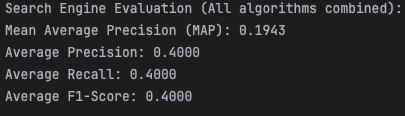